In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

In [4]:
and_nn = trained_reasoner.and_nn
optimizer = T.optim.AdamW(and_nn.parameters(), 0.0001)

for i in range(100000):
    optimizer.zero_grad()
    input1 = T.rand(10)
    input2 = T.rand(10)
    input3 = T.rand(10)
    loss = (F.mse_loss(input1, and_nn(im_mod(input1, input1))))
    if i%10000==0:
        print("loss: ", loss)
    loss.backward()
    optimizer.step()

loss:  tensor(0.5411, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0006, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0018, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0003, grad_fn=<MseLossBackward0>)
loss:  tensor(6.5786e-05, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0008, grad_fn=<MseLossBackward0>)
loss:  tensor(0.0002, grad_fn=<MseLossBackward0>)
loss:  tensor(2.4320e-05, grad_fn=<MseLossBackward0>)
loss:  tensor(3.6165e-05, grad_fn=<MseLossBackward0>)
loss:  tensor(9.8525e-06, grad_fn=<MseLossBackward0>)


In [5]:
input1 = T.rand(10)
print(input1)
print(and_nn(im_mod(input1, input1)))
F.mse_loss(input1, and_nn(im_mod(input1, input1)))

tensor([0.9164, 0.1026, 0.5521, 0.9293, 0.2370, 0.6582, 0.6602, 0.3548, 0.1710,
        0.3960])
tensor([0.9151, 0.1009, 0.5503, 0.9292, 0.2360, 0.6598, 0.6601, 0.3536, 0.1691,
        0.3926], grad_fn=<AddBackward0>)


tensor(2.8645e-06, grad_fn=<MseLossBackward0>)

In [6]:
# seed = 2022
# dataset_path = 'local/out/dataset/sub-100.json'
# ts = timestr()
# train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

# emb_size = 10
# hidden_size = 16
# epoch_count = 15
# test_epoch_count = 10
# batch_size = 32

# T.manual_seed(seed)

# trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
# encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=100, and_nn_loss_weight=50)

train epoch 00/15 | batch 2001/2000 | loss 2.9558 | val loss 2.9791 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.4582 | pr auc 0.2263 | elapsed 32.05s
train epoch 01/15 | batch 2001/2000 | loss 2.0066 | val loss 1.3326 | acc 0.7974 | f1 0.0949 | prec 0.9884 | recall 0.0499 | roc auc 0.5537 | pr auc 0.3433 | elapsed 81.07s
train epoch 02/15 | batch 2001/2000 | loss 1.1712 | val loss 0.8353 | acc 0.8223 | f1 0.3057 | prec 0.9125 | recall 0.1836 | roc auc 0.6749 | pr auc 0.4883 | elapsed 81.34s
train epoch 03/15 | batch 2001/2000 | loss 0.9280 | val loss 0.6417 | acc 0.8293 | f1 0.3791 | prec 0.8424 | recall 0.2446 | roc auc 0.7410 | pr auc 0.5609 | elapsed 80.95s
train epoch 04/15 | batch 2001/2000 | loss 0.8080 | val loss 0.5173 | acc 0.8487 | f1 0.5058 | prec 0.8321 | recall 0.3633 | roc auc 0.8102 | pr auc 0.6641 | elapsed 75.80s
train epoch 05/15 | batch 2001/2000 | loss 0.7178 | val loss 0.4374 | acc 0.8788 | f1 0.6482 | prec 0.8493 | recall 0.5240 | roc auc 0.

In [7]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)
print(F.mse_loss(input, output))

tensor([0.0844, 0.5729, 0.4519, 0.7467, 0.8060, 0.4298, 0.4891, 0.2602, 0.3295,
        0.7167])
tensor([0.0837, 0.5684, 0.4537, 0.7524, 0.8010, 0.4338, 0.4956, 0.2653, 0.3361,
        0.7191], grad_fn=<SqueezeBackward3>)
tensor(2.1473e-05, grad_fn=<MseLossBackward0>)


In [19]:
print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, and_nn(im_mod(input, input)))

tensor([0.1639, 0.7691, 0.8625, 0.9738, 0.4014, 0.9661, 0.5052, 0.3755, 0.3530,
        0.5746])
tensor([-0.0428,  0.5239, -0.0135,  0.6121,  0.0409,  0.5168,  0.2565,  0.5364,
         0.6517,  0.2621], grad_fn=<AddBackward0>)


tensor(0.1608, grad_fn=<MseLossBackward0>)

In [17]:
print(input)
print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([0.1639, 0.7691, 0.8625, 0.9738, 0.4014, 0.9661, 0.5052, 0.3755, 0.3530,
        0.5746])
tensor([ 0.7189,  0.1215,  0.2145, -0.3599,  0.6438, -0.0565,  0.1118,  0.0966,
        -0.3321, -0.3838], grad_fn=<SelectBackward0>)
tensor([ 0.6883,  0.6737,  0.3803, -0.2810,  0.6976, -0.1153, -0.2165, -0.2413,
        -0.1380, -0.2597], grad_fn=<AddBackward0>)
tensor(0.0621, grad_fn=<MseLossBackward0>)


In [18]:
print(input)
print(trained_reasoner.top_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([0.1639, 0.7691, 0.8625, 0.9738, 0.4014, 0.9661, 0.5052, 0.3755, 0.3530,
        0.5746])
tensor([ 0.1431, -0.3569, -0.1694,  0.3597,  0.4051,  0.3065,  0.9996,  0.2121,
        -0.3926,  0.2835], grad_fn=<SelectBackward0>)
tensor([-0.1218,  0.0386, -0.2400,  0.4712, -0.0645,  0.5966,  0.4563,  0.4259,
         0.3024,  0.2468], grad_fn=<AddBackward0>)
tensor(0.2552, grad_fn=<MseLossBackward0>)


In [11]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-0.4341,  0.2636,  0.3784, -0.2389,  0.1522, -0.3676,  0.2434,  0.4135,
          0.1202,  0.1309],
        [ 0.3442, -0.2321, -0.0245, -0.1407,  0.3150,  0.4016,  0.3324,  0.2533,
          0.3882, -0.3025],
        [ 0.4880,  0.0198, -0.0294,  0.1364,  0.0270, -0.5412, -0.4556,  0.1250,
          0.2859, -0.4138],
        [-0.1277, -0.0565,  0.2130, -0.4568,  0.3584, -0.2715, -0.0494, -0.5851,
          0.0933, -0.4236],
        [ 0.1261,  0.3333, -0.0792,  0.2943, -0.2177, -0.2512,  0.4952, -0.4809,
          0.3488,  0.1928],
        [-0.3806,  0.4516, -0.6156, -0.1682, -0.1822,  0.2024, -0.2013,  0.0454,
          0.3120, -0.2383],
        [ 0.2525,  0.4806, -0.4263,  0.0115,  0.5454, -0.2053,  0.2541,  0.0932,
         -0.3736, -0.1307],
        [ 0.5928,  0.2922,  0.2842, -0.6745, -0.4454,  0.0641,  0.0831,  0.0462,
         -0.1179, -0.0198],
        [ 0.2903,  0.6024,  0.3641, -0.0095,  0.4872,  0.3564, -0.5441, -0.1987,
          0.2113,  0.2425

In [12]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*100)/100)

tensor([[1.0000, -0.0000, -0.0000, -0.0000, 0.0000, -0.0000, -0.0000, 0.0000, 0.0000,
         -0.0000],
        [-0.0000, 1.0000, -0.0000, -0.0000, 0.0000, -0.0000, -0.0000, -0.0000, 0.0000,
         -0.0000],
        [0.0000, -0.0000, 1.0000, 0.0000, -0.0000, 0.0000, -0.0000, -0.0000, -0.0000,
         0.0000],
        [0.0000, -0.0000, 0.0000, 1.0100, -0.0000, 0.0000, 0.0000, -0.0000, -0.0000,
         0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, 1.0000, -0.0000, -0.0000, -0.0000, 0.0000,
         -0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 1.0000, 0.0000, 0.0000, -0.0000,
         0.0000],
        [-0.0000, -0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 1.0000, -0.0000, -0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000, 0.0000, -0.0000, 1.0000,
         0.0000],
        [0.0000, 0.0000, -0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0

In [13]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    else:
        train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 0001/1250 | loss 0.9221 | elapsed 0.01s

train epoch 00/10 | batch 1251/1250 | loss 1.1247 | val loss 1.1244 | acc 0.7081 | f1 0.3948 | prec 0.3594 | recall 0.4379 | roc auc 0.6510 | pr auc 0.4829 | elapsed 24.41s
train epoch 01/10 | batch 1251/1250 | loss 0.9629 | val loss 0.7769 | acc 0.7811 | f1 0.4897 | prec 0.4965 | recall 0.4830 | roc auc 0.7465 | pr auc 0.5752 | elapsed 41.43s
train epoch 02/10 | batch 1251/1250 | loss 0.6752 | val loss 0.5525 | acc 0.8438 | f1 0.6083 | prec 0.6686 | recall 0.5580 | roc auc 0.8346 | pr auc 0.6975 | elapsed 41.30s
train epoch 03/10 | batch 1251/1250 | loss 0.4975 | val loss 0.4220 | acc 0.8857 | f1 0.7069 | prec 0.7990 | recall 0.6337 | roc auc 0.8961 | pr auc 0.8030 | elapsed 41.77s
train epoch 04/10 | batch 1251/1250 | loss 0.3941 | val loss 0.3460 | acc 0.9133 | f1 0.7771 | prec 0.8816 | recall 0.6947 | roc auc 0.9329 | pr auc 0.8704 | elapsed 41.82s
train epoch 05/10 | batch 1251/1250 | loss 0.3327 | val loss 0.2997 | acc 0.9305 | f1 0.8229 | prec 0.9232 | recall 0.7423 | roc auc 0.

In [14]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
   # _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240626T190130


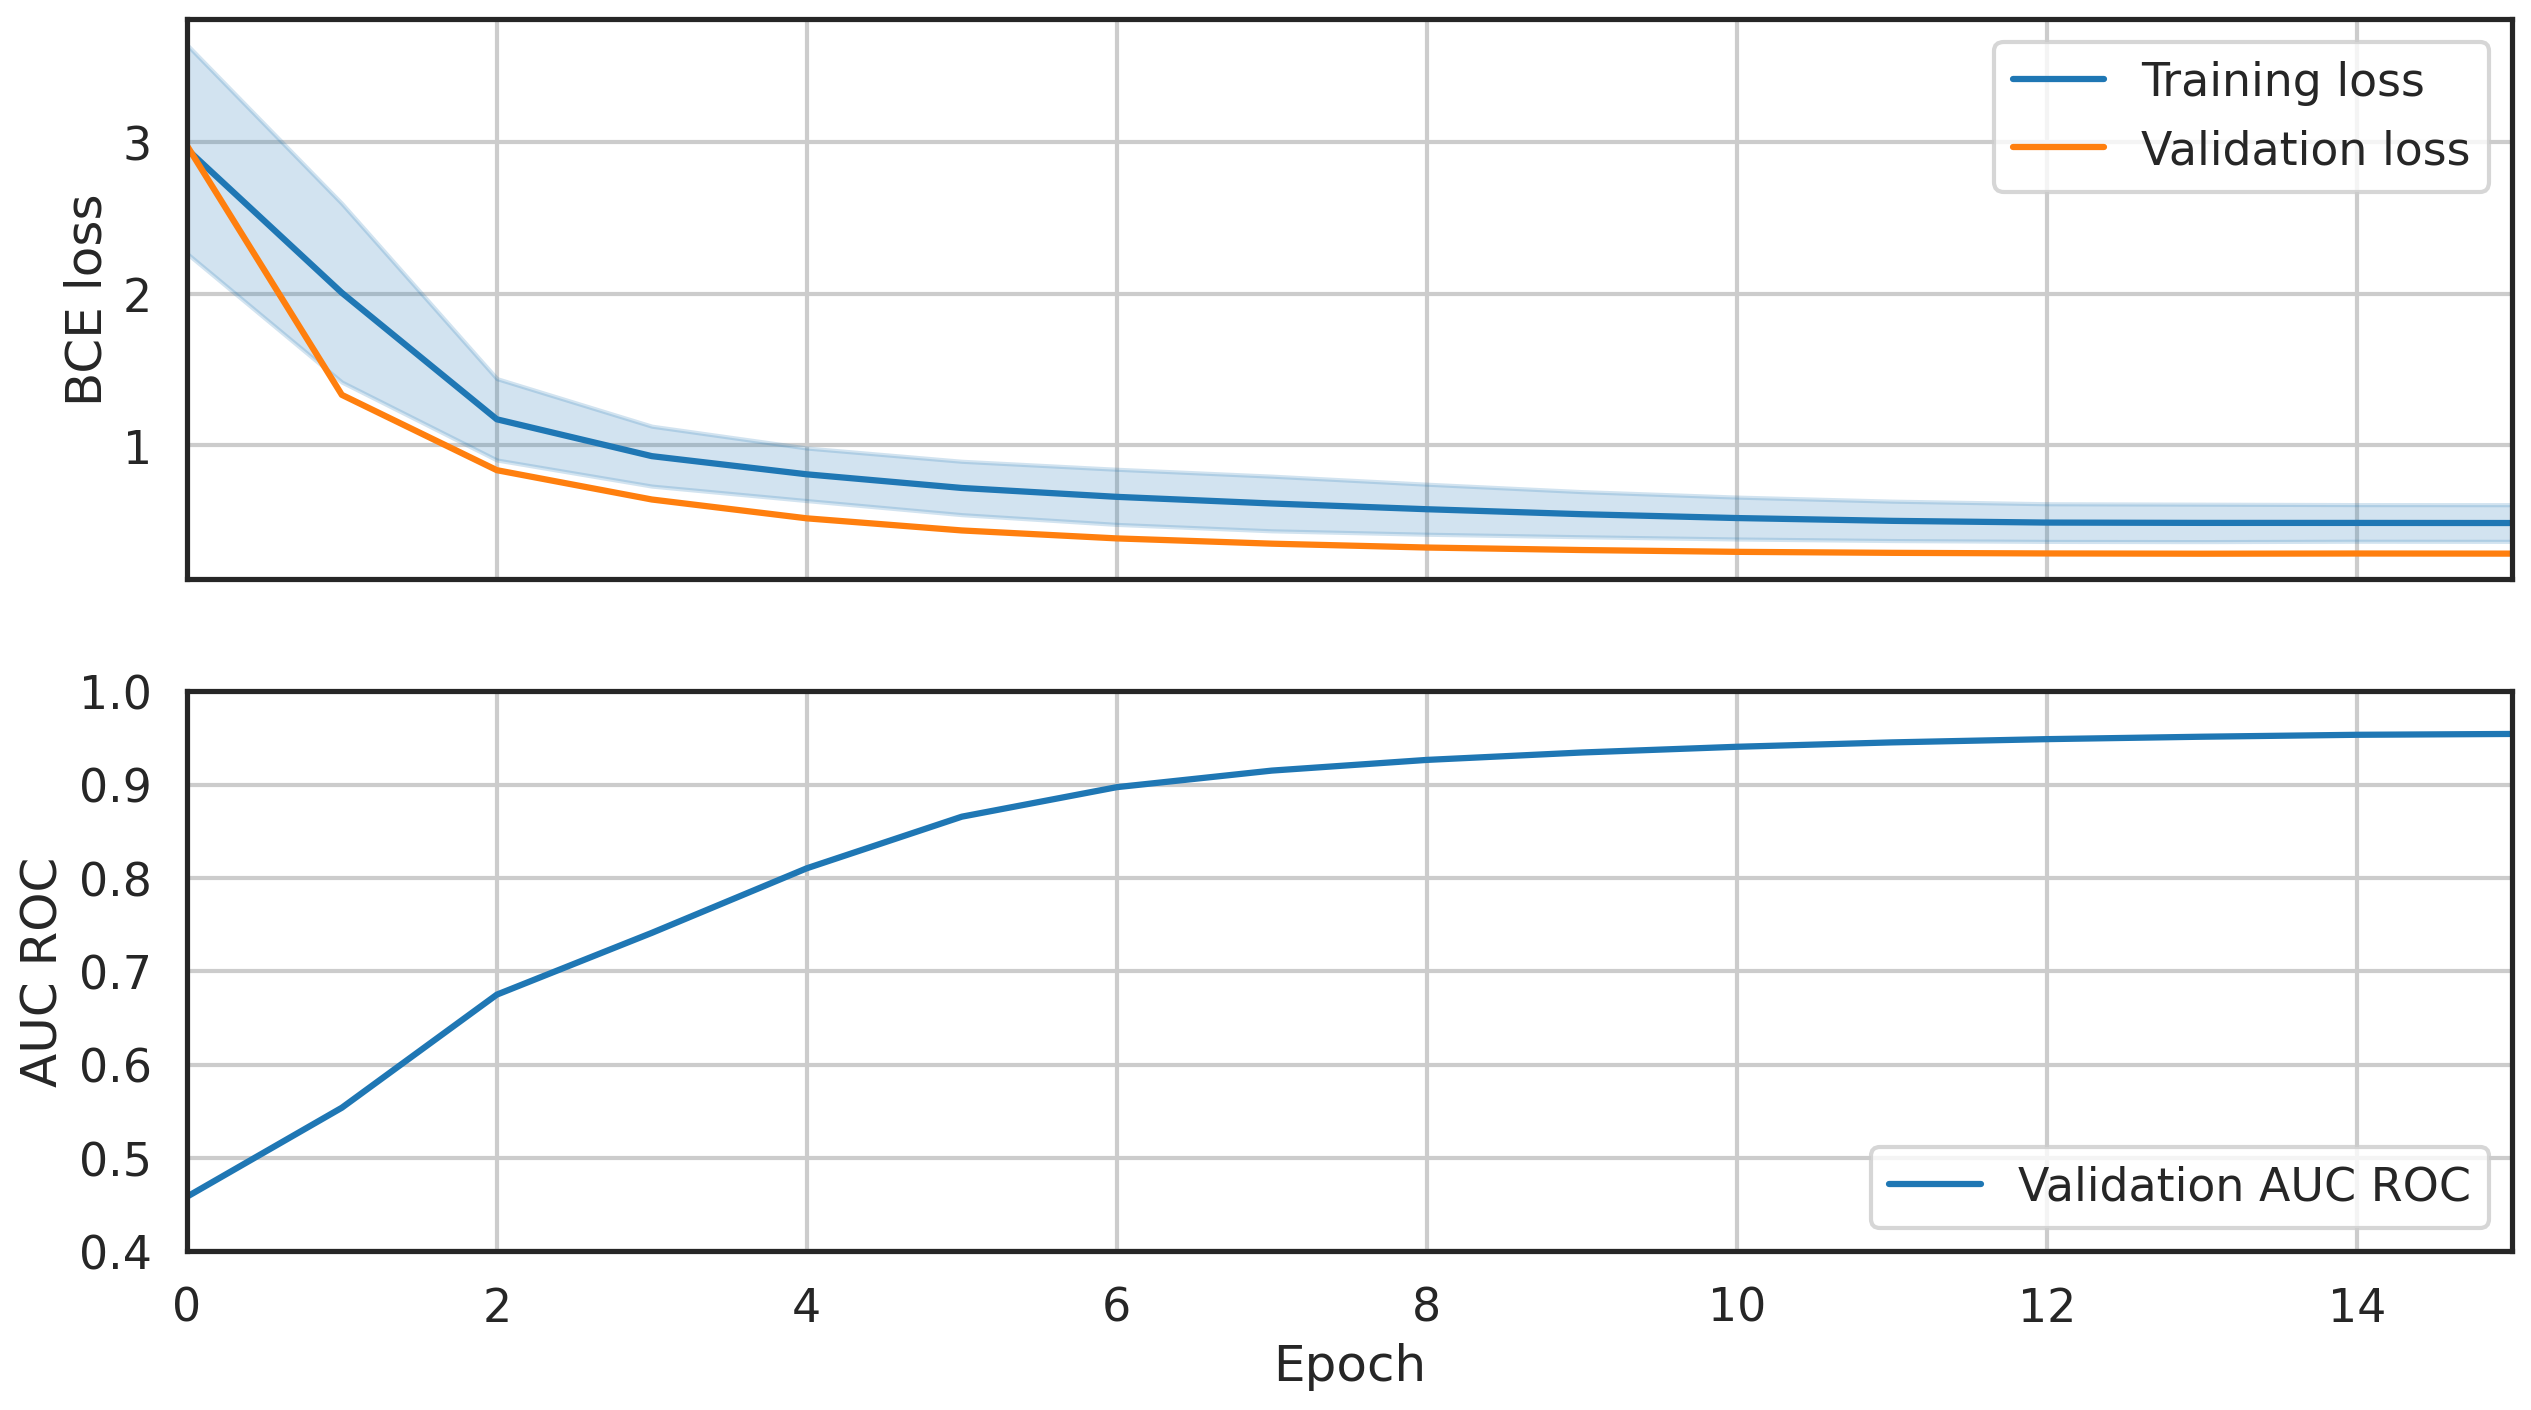

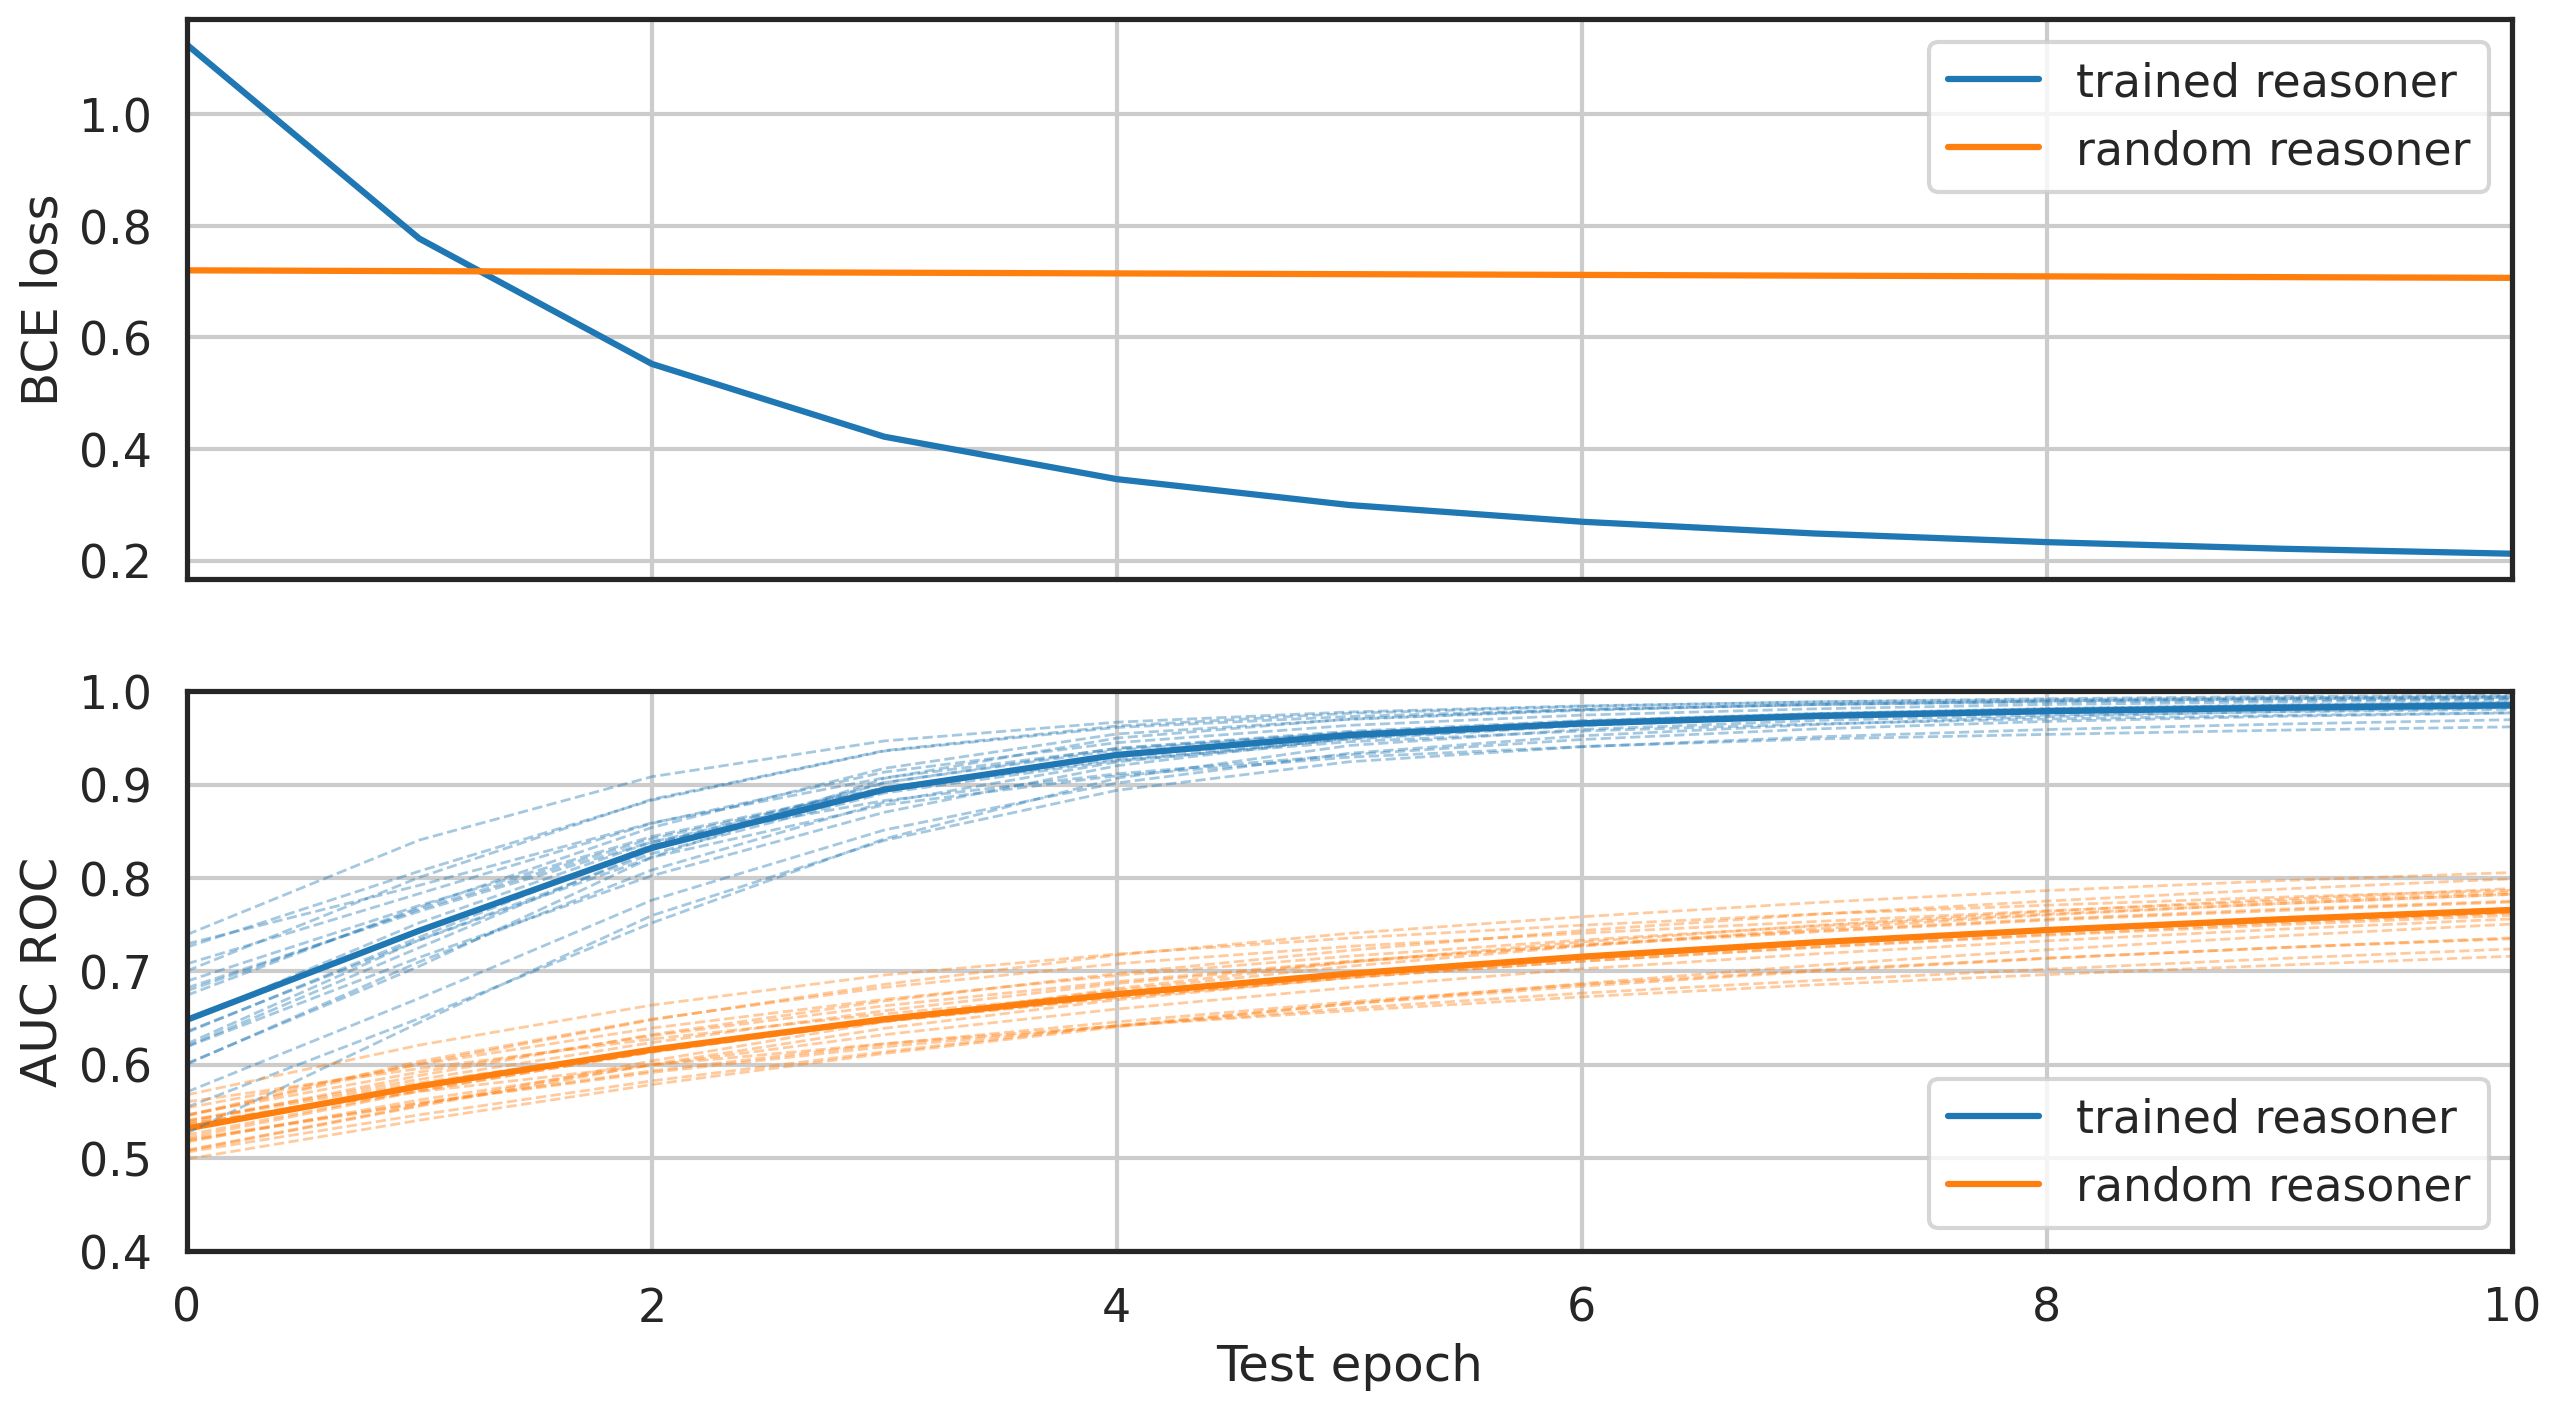

             mean       std     micro
acc      0.961950  0.014752  0.961950
prec     0.967365  0.023181  0.967788
recall   0.851237  0.050106  0.853381
f1       0.905192  0.036921  0.906991
auc_roc  0.984779  0.008590  0.985794
auc_pr   0.965302  0.018116  0.967911


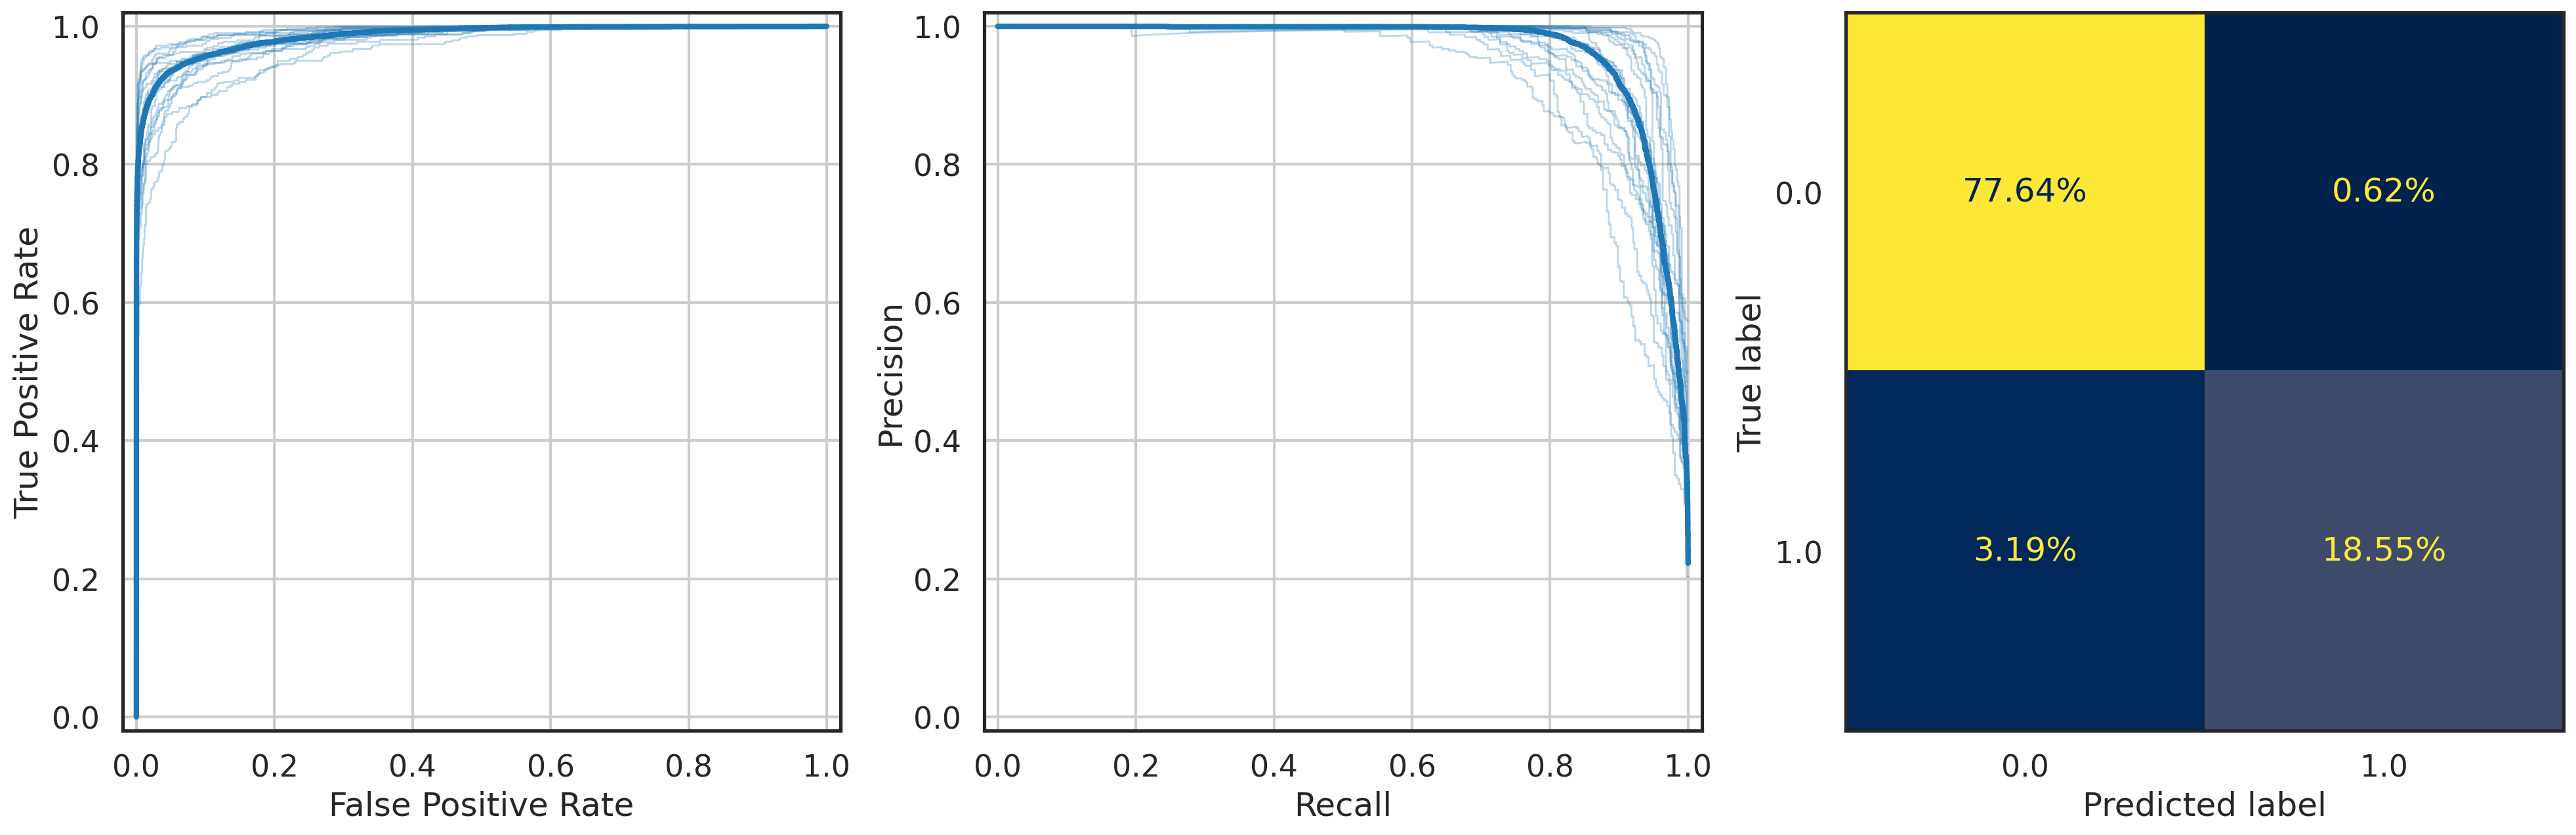

In [15]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))

In [16]:
input = T.rand(10)
print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input,trained_reasoner.and_nn(im_mod( input, input)) )

tensor([0.1639, 0.7691, 0.8625, 0.9738, 0.4014, 0.9661, 0.5052, 0.3755, 0.3530,
        0.5746])
tensor([-0.0428,  0.5239, -0.0135,  0.6121,  0.0409,  0.5168,  0.2565,  0.5364,
         0.6517,  0.2621], grad_fn=<AddBackward0>)


tensor(0.1608, grad_fn=<MseLossBackward0>)